### We will study the distribution of the slope and intercept parameters of a linear model. Consider the following model:

$$
y_i = a x_i + b + \epsilon_i \quad \text{where} \quad a = \frac{1}{2}, \, b = 2, \, \epsilon_i \sim \text{Normal}\left(0, \frac{1}{5}\right), \, 1 \leq i \leq N   \quad\quad (1)
$$

For the purpose of this exercise, you will take $ n = 200 $ and generate the $ x_i $'s by:

```python
x = np.linspace(-5, 5, 200)

  

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats
from scipy.stats import t, cauchy, norm  

Lets generate 10000 sets of error vectors εi and use them to perform 10000 linear regression of the Ndimensional vectors (yi) against (xi), where yi
is given by (1).

In [9]:
a = 0.5
b = 2
n = 200
sims = 10000

slopes = []
intercepts = []
slope_test_stats = []
intrcpt_test_stats = []

x = np.linspace(-5, 5, n)
e_norm_std = np.sqrt(0.2) 

for i in range(sims):
        
    e_i = norm.rvs(loc = 0 , scale = e_norm_std, size = n)
    y = a*x +b + e_i

    a_hat, b_hat, r_value, p_value, std_err = stats.linregress(x, y) 
    slopes.append(a_hat)
    intercepts.append(b_hat)

    #2c)i)
    #slopes test statistic for hypothesis a=2 
    slope_test_stat = (a_hat - a) * np.sqrt((n-2) * ( ( x-x.mean())**2 ).sum() ) / np.sqrt( ((y - b - a*x)**2).sum() )
    slope_test_stats.append(slope_test_stat)
    #ii)
    #intercepts test statistic for hypothesis b = 0.5
    intrcpt_test_stat = (b_hat - b) * np.sqrt( n*(n-2) * ( ( x-x.mean())**2 ).sum() ) / np.sqrt( ((y - b - a*x)**2).sum() * (x**2).sum() ) 
    intrcpt_test_stats.append(intrcpt_test_stat)

a_hat, b_hat, r_value, p_value, std_err

(0.4927410174006295,
 2.026064951847531,
 0.9491960626774727,
 2.2646528967068726e-101,
 0.011609316228720351)

We collect the slopes and the intercepts of these 10000 linear regressions and plot their histograms
against their respective theoretical densities.

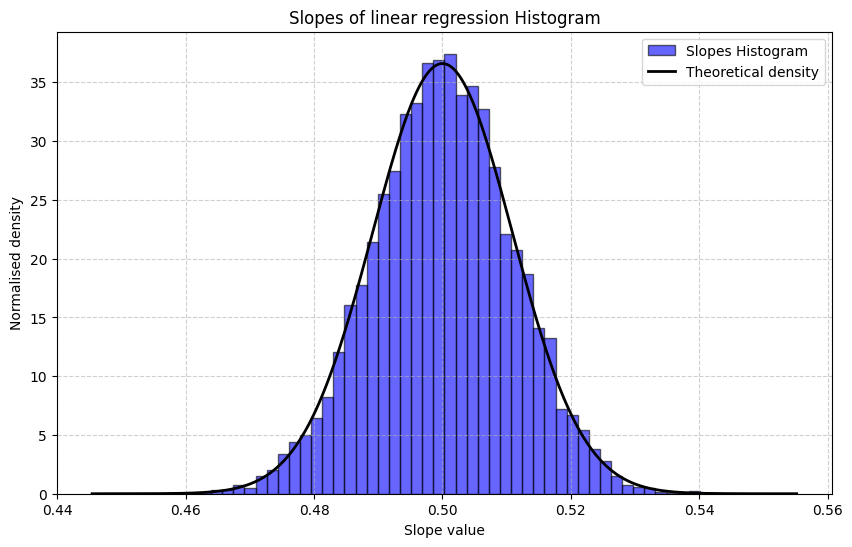

In [10]:
x_values = np.linspace(min(slopes) -std_err, max(slopes) + std_err, 1000 )  
p = norm.pdf(x_values,   
             loc = a,
             scale= np.sqrt(  (e_norm_std**2) / ( (x-x.mean())**2).sum()  ) 
            )  

plt.figure(figsize=(10, 6))

plt.hist(slopes, bins=50, color='blue', edgecolor='black', alpha=0.6, density=True, label="Slopes Histogram")
plt.plot(x_values, p, 'k-', linewidth=2, label= "Theoretical density")
plt.title("Slopes of linear regression Histogram")
plt.xlabel("Slope value")
plt.ylabel("Normalised density") 

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

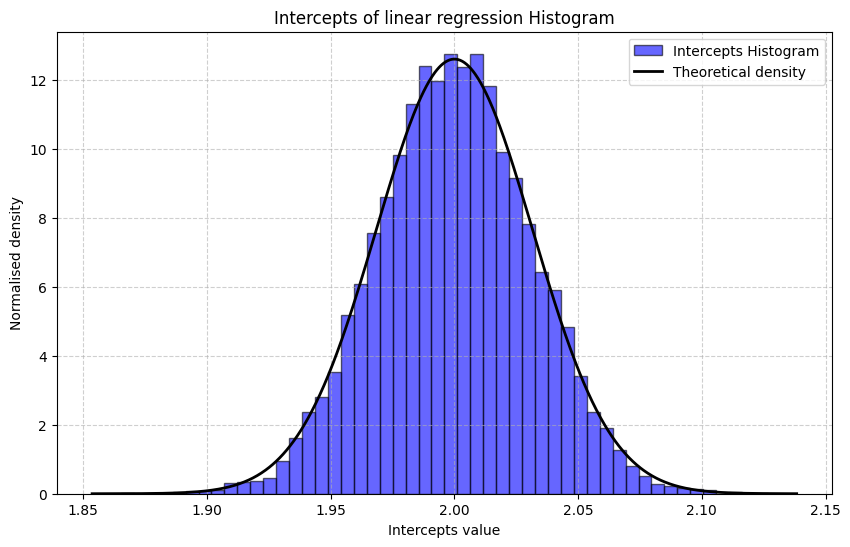

In [11]:
x_values = np.linspace( min(intercepts)-std_err , max(intercepts)+std_err , 1000 )  
p = norm.pdf(x_values,   
             loc = b,
             scale= np.sqrt( (e_norm_std**2) * (x**2).sum() / ( n * (x-x.mean())**2).sum() ) 
            )  

plt.figure(figsize=(10, 6))

plt.hist(intercepts, bins=50, color='blue', edgecolor='black', alpha=0.6, density=True, label="Intercepts Histogram")
plt.plot(x_values, p, 'k-', linewidth=2, label= "Theoretical density")
plt.title("Intercepts of linear regression Histogram")
plt.xlabel("Intercepts value")
plt.ylabel("Normalised density") 

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Perfect fit for both slopes and intercepts as expected due to the fact that errors are normally distributed with mean 0 and some standard deviation.

For each of the 10000 regression, we will now compute the test statistic for the slope and for the intercept and plot their histograms against their theoretical density. 

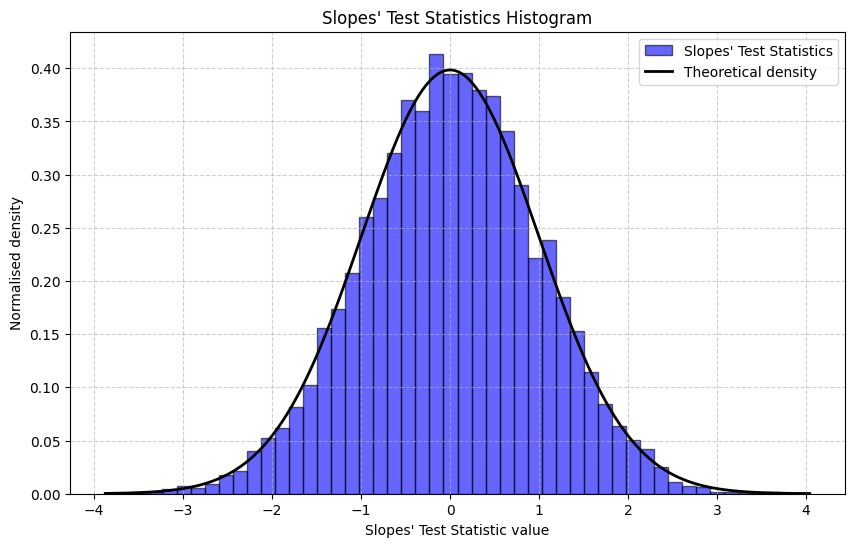

In [12]:
x_values = np.linspace( min(slope_test_stats)-std_err , max(slope_test_stats)+std_err , 1000 )  
p = t.pdf( x_values, df = n-2 )  

plt.figure(figsize=(10, 6))

plt.hist(slope_test_stats, bins=50, color='blue', edgecolor='black', alpha=0.6, density= True, label="Slopes' Test Statistics")
plt.plot(x_values, p, 'k-', linewidth=2, label= "Theoretical density")
plt.title("Slopes' Test Statistics Histogram")
plt.xlabel("Slopes' Test Statistic value")
plt.ylabel("Normalised density") 

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

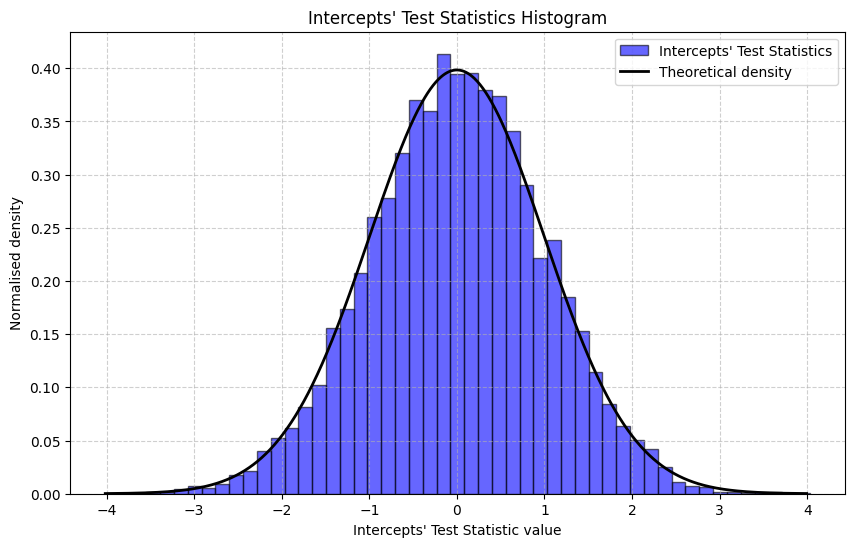

In [13]:
x_values = np.linspace( min(intrcpt_test_stats)-std_err , max(intrcpt_test_stats)+std_err , 1000 )  
p = t.pdf( x_values, df = n-2 )  

plt.figure(figsize=(10, 6))

plt.hist(slope_test_stats, bins=50, color='blue', edgecolor='black', alpha=0.6, density= True, label="Intercepts' Test Statistics")
plt.plot(x_values, p, 'k-', linewidth=2, label= "Theoretical density")
plt.title("Intercepts' Test Statistics Histogram")
plt.xlabel("Intercepts' Test Statistic value")
plt.ylabel("Normalised density") 

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Perfect fit for both slopes and intercepts test statistics as expected due to the fact that errors are normally distributed with mean 0 and some standard deviation.

Here we take the last of our regressions and perform the following two tests with $ \alpha = 99\% \\ $ 




$$
\textbf{First test:} \quad H_0 : a = \frac{1}{2} \quad (\text{assuming} \ b = 2)
$$

$$
\textbf{Second test:} \quad H_0 : b = 2 \quad (\text{assuming} \ a = \frac{1}{2})
$$
 
 

$\text{Output: (1) the value of the test statistic, (2) the p-value, (3) the upper and lower bound of the critical region.}$


In [14]:
alpha = 0.01

intercept_test_stat = intrcpt_test_stats[-1]
t_critical_value = t.ppf(q = 1 - alpha/2, df = 200 - 2) 
intercept_p_value = 1 - t.cdf(x= intercept_test_stat, df = 200 - 2) 


print("1. Test Statistic:", intercept_test_stat)
print("2. P-value:", intercept_p_value)
print("3. Critical Region Bounds: ({:.3f}, {:.3f})".format(-t_critical_value, t_critical_value))

if intercept_p_value < alpha/2 :
    print(f"\nConclusion: We reject the null hypothesis at alpha = {1 - alpha/2}. \nTherefore there is significant evidence that a != {a} (assuming b={b})")
else:
    print("\n Conclusion: We fail to reject the null hypothesis as there is no significant evidence to reject H0. \n "
         f"It is reasonable to assume that a = {a} (assuming b={b})" )
     

1. Test Statistic: 0.771945353874558
2. P-value: 0.22053357869921064
3. Critical Region Bounds: (-2.601, 2.601)

 Conclusion: We fail to reject the null hypothesis as there is no significant evidence to reject H0. 
 It is reasonable to assume that a = 0.5 (assuming b=2)


In [15]:
slope_test_stat = slope_test_stats[-1]
t_critical_value = t.ppf(q = 1 - alpha/2, df = 200 - 2)  
slope_p_value = 1 - t.cdf(x= slope_test_stat, df = 200 - 2) 

print("1. Test Statistic:", slope_test_stat)
print("2. P-value:", slope_p_value)
print("3. Critical Region Bounds: ({:.3f}, {:.3f})".format(-t_critical_value, t_critical_value))

if intercept_p_value < alpha/2 :
    print(f"\nConclusion: We reject the null hypothesis at alpha = {1 - alpha/2}. \nTherefore there is significant evidence that b != {b} (assuming a={a})")
else:
    print("\n Conclusion: We fail to reject the null hypothesis as there is no significant evidence to reject H0. \n "
         f"It is reasonable to assume that b={b} (assuming a={a})" )
    
# t_critical_value ,slope_test_stat , slopes[-1] , a ,  1 - t.cdf(x = 2.6008872779626224 , df = n-2) , 2 * (1 - stats.t.cdf(abs(slope_test_stat), df = n-2))

1. Test Statistic: -0.6237150930914206
2. P-value: 0.7332337067629489
3. Critical Region Bounds: (-2.601, 2.601)

 Conclusion: We fail to reject the null hypothesis as there is no significant evidence to reject H0. 
 It is reasonable to assume that b=2 (assuming a=0.5)


### Remark: Both tests are two-tailed and hence why we used a = 99.5%

Now we change the model to

$$
y_i = a x_i + b + \varepsilon_i \quad \text{where } a = \frac{1}{2}, b = 2, \varepsilon_i \sim \text{Cauchy}\left(0, \frac{1}{5}\right), 1 \leq i \leq N \tag{2}
$$

and perform another 10,000 regressions based on this model and collect the slopes and intercepts of these regressions as well as the associated statistics.  

In [16]:
a = 0.5
b = 2

n = 200
sims = 10000

slopes = []
intercepts = []
slope_test_stats = []
intrcpt_test_stats = []

x = np.linspace(-5, 5, n)
e_cauchy_scale = 0.2

for i in range(sims):
        
    e_i = cauchy.rvs(scale = e_cauchy_scale, size = n)
    y = a*x +b + e_i

    a_hat, b_hat, r_value, p_value, std_err = stats.linregress(x, y) 
    slopes.append(a_hat)
    intercepts.append(b_hat)

    #2c)i)
    slope_test_stat = (a_hat - a) * np.sqrt((n-2) * ( ( x-x.mean())**2 ).sum() ) / np.sqrt( ((y - b - a*x)**2).sum() ) #slopes test statistic for hypothesis a=2 
    slope_test_stats.append(slope_test_stat)

    #ii)
    intrcpt_test_stat = (b_hat - b) * np.sqrt( n*(n-2) * ( ( x-x.mean())**2 ).sum() ) / np.sqrt( ((y - b - a*x)**2).sum() * (x**2).sum() ) #intercepts test statistic for hypothesis b = 0.5
    intrcpt_test_stats.append(intrcpt_test_stat)

a_hat, b_hat, r_value, p_value, std_err

(0.5021571668548341,
 1.8655902709218584,
 0.6574820114262877,
 3.903524971010496e-26,
 0.040896797348080986)

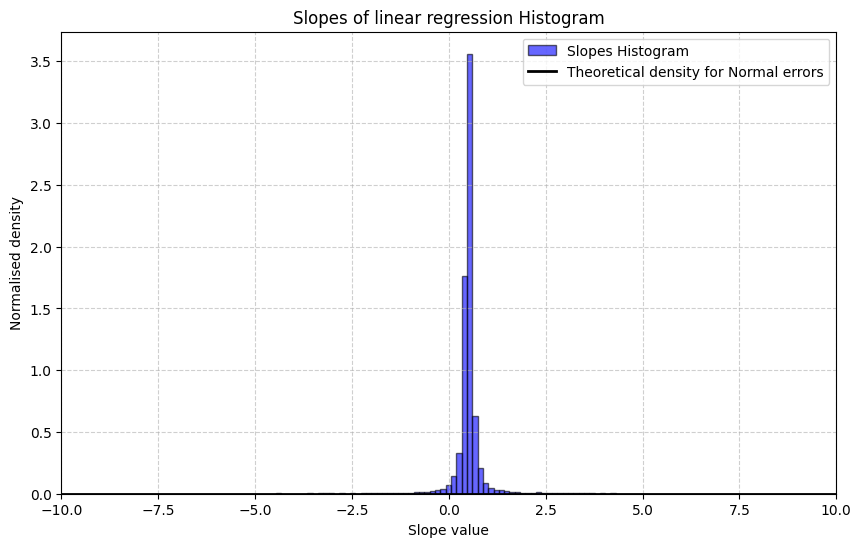

In [17]:
x_values = np.linspace(min(slopes) -std_err, max(slopes) + std_err, 1000 )  
p = norm.pdf(x_values,   
             loc = a,
             scale= np.sqrt(  (e_cauchy_scale**2) / ( (x-x.mean())**2).sum()  ) 
            )  

plt.figure(figsize=(10, 6))

plt.hist(slopes, bins=5000, color='blue', edgecolor='black', alpha=0.6, density=True, label="Slopes Histogram")
plt.plot(x_values, p, 'k-', linewidth=2, label= "Theoretical density for Normal errors")
plt.title("Slopes of linear regression Histogram")
plt.xlabel("Slope value")
plt.ylabel("Normalised density") 
plt.xlim(-10, 10 )
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

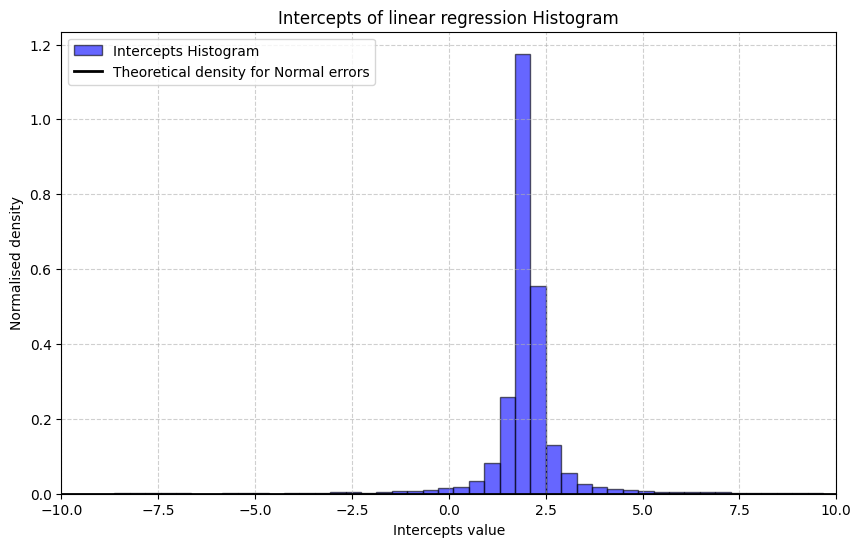

In [18]:
x_values = np.linspace( min(intercepts)-std_err , max(intercepts)+std_err , 1000 )  
p = norm.pdf(
    x_values,   
    loc = b,
    scale= np.sqrt( (e_norm_std**2) * (x**2).sum() / ( n * (x-x.mean())**2).sum() ) 
)  

plt.figure(figsize=(10, 6))

plt.hist(intercepts, bins=5000, color='blue', edgecolor='black', alpha=0.6, density=True, label="Intercepts Histogram")
plt.plot(x_values, p, 'k-', linewidth=2, label= "Theoretical density for Normal errors")
plt.title("Intercepts of linear regression Histogram")
plt.xlabel("Intercepts value")
plt.ylabel("Normalised density") 
plt.xlim(-10, 10 )
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

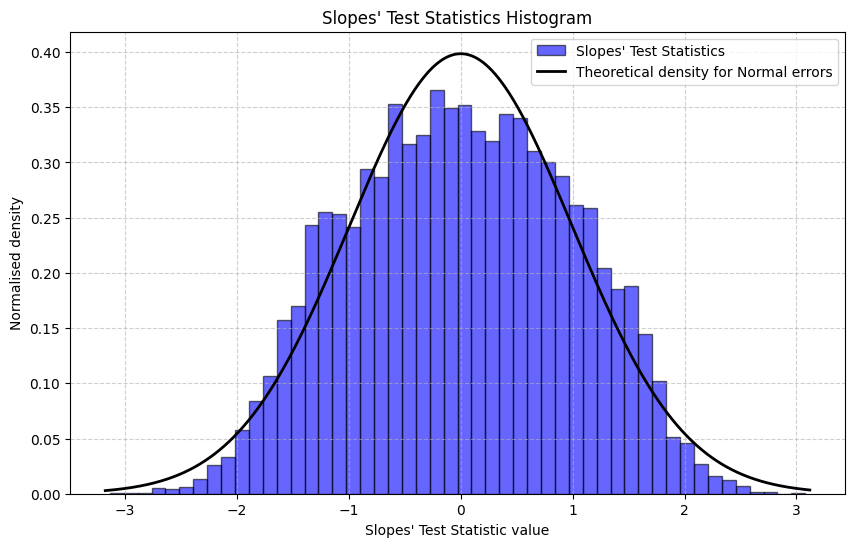

In [19]:
x_values = np.linspace( min(slope_test_stats)-std_err , max(slope_test_stats)+std_err , 1000 )  
p = t.pdf( x_values, df = n-2 )  

plt.figure(figsize=(10, 6))

plt.hist(slope_test_stats, bins=50, color='blue', edgecolor='black', alpha=0.6, density= True, label="Slopes' Test Statistics")
plt.plot(x_values, p, 'k-', linewidth=2, label= "Theoretical density for Normal errors")
plt.title("Slopes' Test Statistics Histogram")
plt.xlabel("Slopes' Test Statistic value")
plt.ylabel("Normalised density") 

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

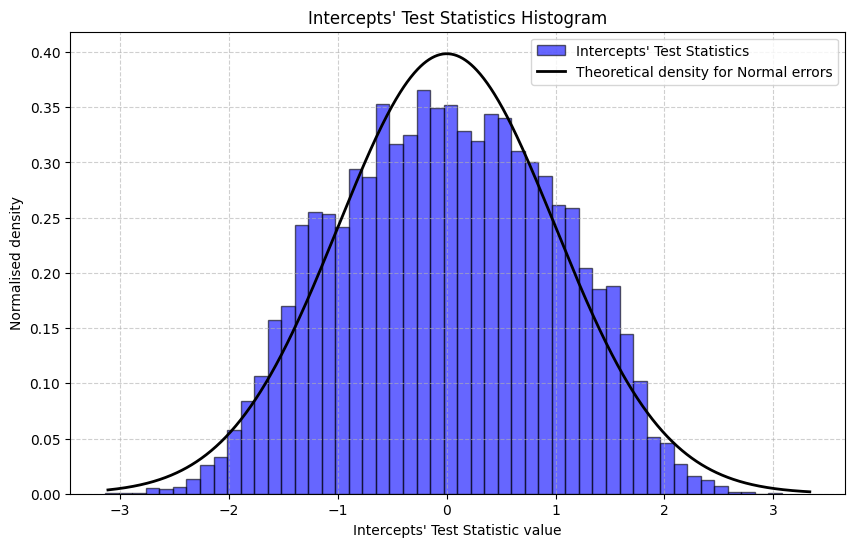

In [20]:
x_values = np.linspace( min(intrcpt_test_stats)-std_err , max(intrcpt_test_stats)+std_err , 1000 )  
p = t.pdf( x_values, df = n-2 )  

plt.figure(figsize=(10, 6))

plt.hist(slope_test_stats, bins=50, color='blue', edgecolor='black', alpha=0.6, density= True, label="Intercepts' Test Statistics")
plt.plot(x_values, p, 'k-', linewidth=2, label= "Theoretical density for Normal errors")
plt.title("Intercepts' Test Statistics Histogram")
plt.xlabel("Intercepts' Test Statistic value")
plt.ylabel("Normalised density") 

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### The Distribution $ \text{Cauchy}\left(0, \frac{1}{5}\right) $  has:
 
-  The center of the distribution is at $0$.
-  The scale parameter determines the spread $\gamma = \frac{1}{5}$.
- The PDF for $ \text{Cauchy}\left(0, \frac{1}{5}\right) $ is:
 
$$
    f(x) = \frac{1}{\pi \left(\frac{1}{5}\right) \left[1 + \left(5x\right)^2\right]} = \frac{5}{\pi \left[1 + 25x^2\right]}
$$

#### Properties:
1. **Heavy Tails**: The Cauchy distribution has much heavier tails compared to distributions like the normal distribution, meaning extreme values are more probable.
2. **Undefined Mean and Variance**: The integral required to compute the mean or variance does not converge for the Cauchy distribution.
 
 
 This leads us to the following conclusions: 

 


### 1) 

With the cauchy distribution having undefined mean and variance, we expect the errors and hence the slope and intercepts to have extreme outliars caused by the heavy tails. 
As indicated by the first two histograms we can see exactly this and that not only the theoritical densities for $ Normal(0, \sigma^2) $ indeed do not apply here. 

### 2) 
The histograms of the statistics are also not equal to the theoritical distributions. This is expected as the theoritcal distributions apply only for errors generated from a $ Normal(0, \sigma^2) $
